#Project11- To perform EDA and to train the model to predict whether the person have annual salary greater or smaller that $50K.

In [1]:
#Importing some neccessary libraries# Checking datatypes of each variables
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_census=pd.read_csv('http://mlr.cs.umass.edu/ml/machine-learning-databases/adult/adult.data')
df_census

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
df_census.columns

Index(['39', ' State-gov', ' 77516', ' Bachelors', ' 13', ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', ' 2174', ' 0',
       ' 40', ' United-States', ' <=50K'],
      dtype='object')

In [4]:
df_census.shape

(32560, 15)

We can see that we have to set appropriate columns for this data set

In [5]:
df_census.columns=['Age','workclass','finalweight','education','education-num','marital-status','occupation',
                   'relationship','race','sex','capital-loss','miss','hours-per-week','native-country','income']

In [6]:
df_census.head()                 

,Age,workclass,finalweight,education,education-num,marital-status,occupation,relationship,race,sex,capital-loss,miss,hours-per-week,native-country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


The variables Age, education,martial-status,occupation,relationship,race,sex,native-country,hours-per-week are self-explanatory.

Whereas----

finalweight: sampling weight
    
education-num: number of years of education in total
    
capital-gain/capital-loss: income from investment sources other than salary/wages
    
finalweight is not related to the target variable income and will be removed before building the model

In [7]:
#Checking for data types
df_census.dtypes

Age                int64
workclass         object
finalweight        int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-loss       int64
miss               int64
hours-per-week     int64
native-country    object
income            object
dtype: object

We have to encode all object type variables later 

In [8]:
#Checking description of dataset
df_census.describe()

,Age,finalweight,education-num,capital-loss,miss,hours-per-week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [9]:
#Checking for null values
df_census.isnull().any()

Age               False
workclass         False
finalweight       False
education         False
education-num     False
marital-status    False
occupation        False
relationship      False
race              False
sex               False
capital-loss      False
miss              False
hours-per-week    False
native-country    False
income            False
dtype: bool

We can see that there is no null values present , our data is clean

--Performing EDA for the above data to get insight of data--

In [10]:
#Importing some more necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

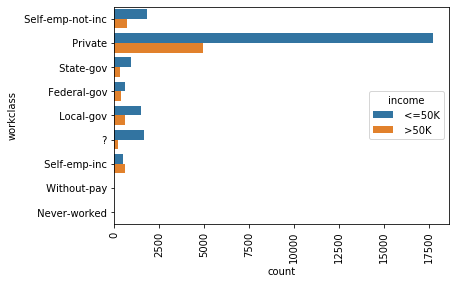

In [11]:
sns.countplot(y='workclass',hue='income',data=df_census)
plt.xticks(rotation=90)
plt.show()

We can se that there is missing/"?" value, we can rename it 

In [12]:
df_census['workclass'].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [13]:
df_census['workclass'].replace({' ?':'Others'},inplace=True)

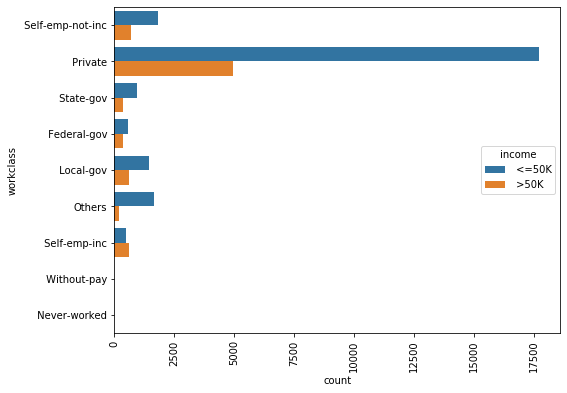

In [14]:
plt.figure(figsize=(8,6))
sns.countplot(y='workclass',hue='income',data=df_census)
plt.xticks(rotation=90)
plt.show()

We can see that People who works for Private sector have more income 

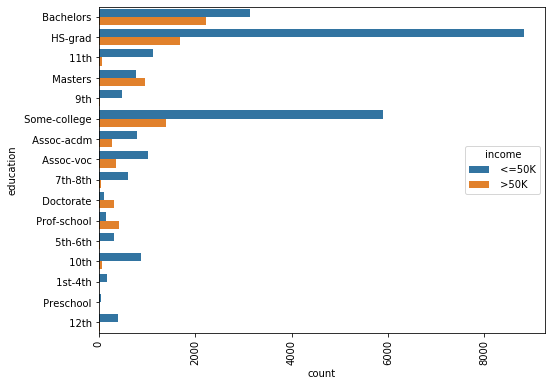

In [15]:
plt.figure(figsize=(8,6))
sns.countplot(y='education',hue='income',data=df_census)
plt.xticks(rotation=90)
plt.show()

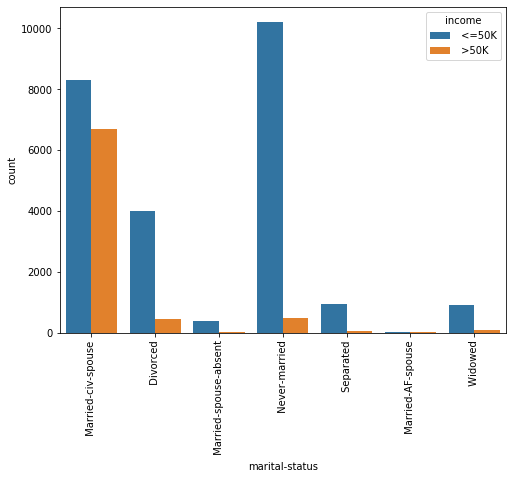

In [16]:
plt.figure(figsize=(8,6))
sns.countplot(x='marital-status',hue='income',data=df_census)
plt.xticks(rotation=90)
plt.show()

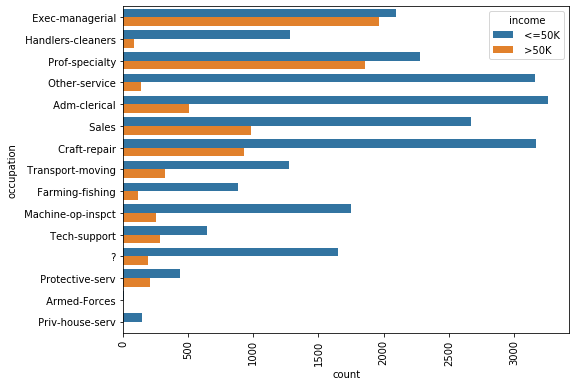

In [17]:
plt.figure(figsize=(8,6))
sns.countplot(y='occupation',hue='income',data=df_census)
plt.xticks(rotation=90)
plt.show()

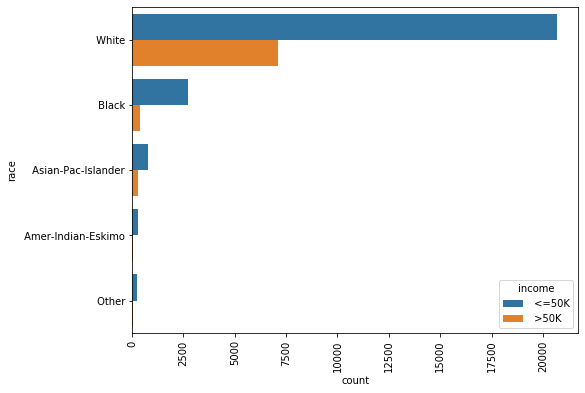

In [18]:
plt.figure(figsize=(8,6))
sns.countplot(y='race',hue='income',data=df_census)
plt.xticks(rotation=90)
plt.show()

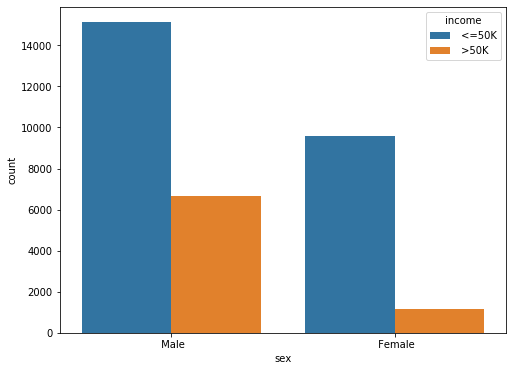

In [19]:
plt.figure(figsize=(8,6))
sns.countplot(x='sex',hue='income',data=df_census)
plt.show()

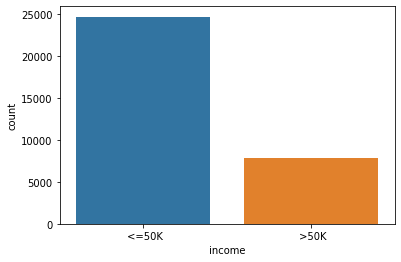

In [20]:
sns.countplot(df_census.income)
plt.show()

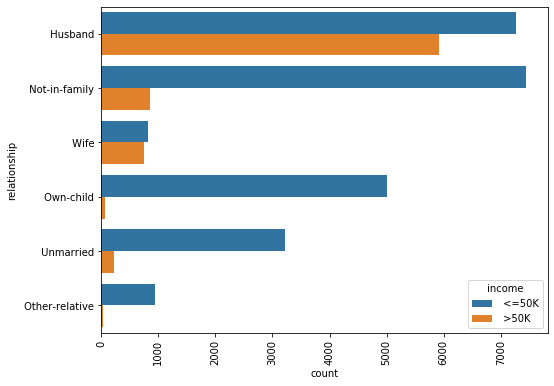

In [21]:
plt.figure(figsize=(8,6))
sns.countplot(y='relationship',hue='income',data=df_census)
plt.xticks(rotation=90)
plt.show()

In [22]:
#Using Label Encoder to encode the variables
from sklearn.preprocessing import LabelEncoder 
LE=LabelEncoder()
col=['income']
for val in col:
    df_census[val]=LE.fit_transform(df_census[val].astype(str))

In [23]:
df_census.head()   

,Age,workclass,finalweight,education,education-num,marital-status,occupation,relationship,race,sex,capital-loss,miss,hours-per-week,native-country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0


We have endoded the 'income' variable and now <=50K is showing by 0 and >50K is showing by 1

In [24]:
def Kdeplot(x):
    fig = plt.figure(figsize=(10,4))
    ax=sns.kdeplot(df_census.loc[(df_census['income'] == 0),x] , color='r',shade=True, label='Income less than 50K') 
    ax=sns.kdeplot(df_census.loc[(df_census['income'] == 1),x] , color='g',shade=True, label='Income more than 50K')
    plt.title(' Income category with respect to {}'.format(x))

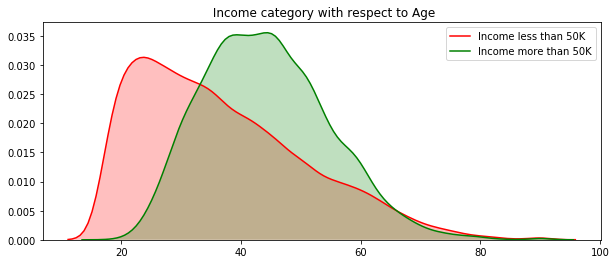

In [25]:
Kdeplot('Age')

We can see that the person between the age of 30-55 have maximum number of people have having income more than 50K

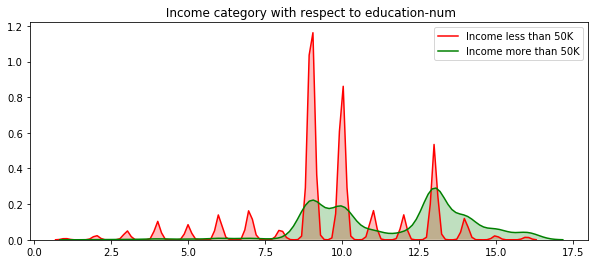

In [26]:
Kdeplot('education-num')

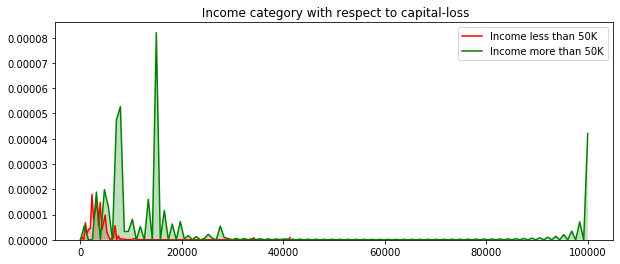

In [27]:
Kdeplot('capital-loss')

We can see that the person having capital loss between 15000 to 20000 have income more than 50K

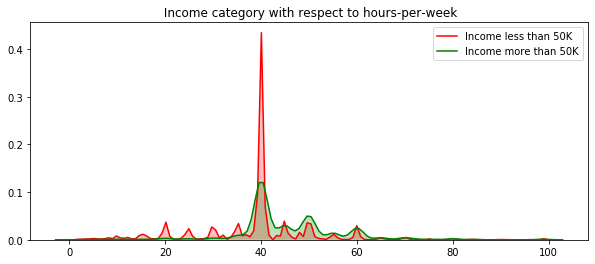

In [28]:
Kdeplot('hours-per-week')

In [29]:
#Now we have to encode other object variables to int/float using Label Encoder
#Using Label Encoder to encode
LE=LabelEncoder()
list=['workclass','education', 'marital-status', 'occupation', 'relationship' , 'race', 'sex', 'native-country']
for val in list:
    df_census[val]=LE.fit_transform(df_census[val].astype(str))

In [30]:
df_census.head()

,Age,workclass,finalweight,education,education-num,marital-status,occupation,relationship,race,sex,capital-loss,miss,hours-per-week,native-country,income
0,50,5,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,38,3,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,53,3,234721,1,7,2,6,0,2,1,0,0,40,39,0
3,28,3,338409,9,13,2,10,5,2,0,0,0,40,5,0
4,37,3,284582,12,14,2,4,5,4,0,0,0,40,39,0


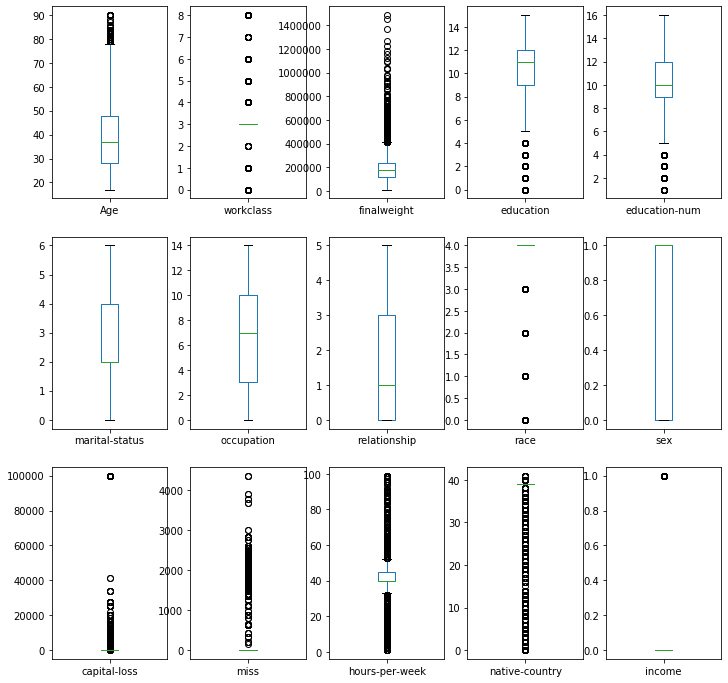

In [31]:
#Checking for outliers
df_census.plot(kind='box',subplots=True,layout=(3,5),figsize=(12,12))
plt.show()

In [32]:
#Using Z score to remove outliers
from scipy.stats import zscore
z_score=np.abs(zscore(df_census))
z_score

array([[0.83709708, 1.02638429, 1.0087417 , ..., 2.22212013, 0.29157343,
        0.5632099 ],
       [0.04264043, 0.23786147, 0.24504633, ..., 0.03542999, 0.29157343,
        0.5632099 ],
       [1.05703146, 0.23786147, 0.42576955, ..., 0.03542999, 0.29157343,
        0.5632099 ],
       ...,
       [1.42358875, 0.23786147, 0.3588108 , ..., 0.03542999, 0.29157343,
        0.5632099 ],
       [1.21562378, 0.23786147, 0.11092744, ..., 1.65520046, 0.29157343,
        0.5632099 ],
       [0.98372   , 0.39426141, 0.92986178, ..., 0.03542999, 0.29157343,
        1.77553698]])

In [33]:
print(df_census.shape)
thresold=3
census=df_census[(z_score<3).all(axis=1)]
census.shape

(32560, 15)


(27417, 15)

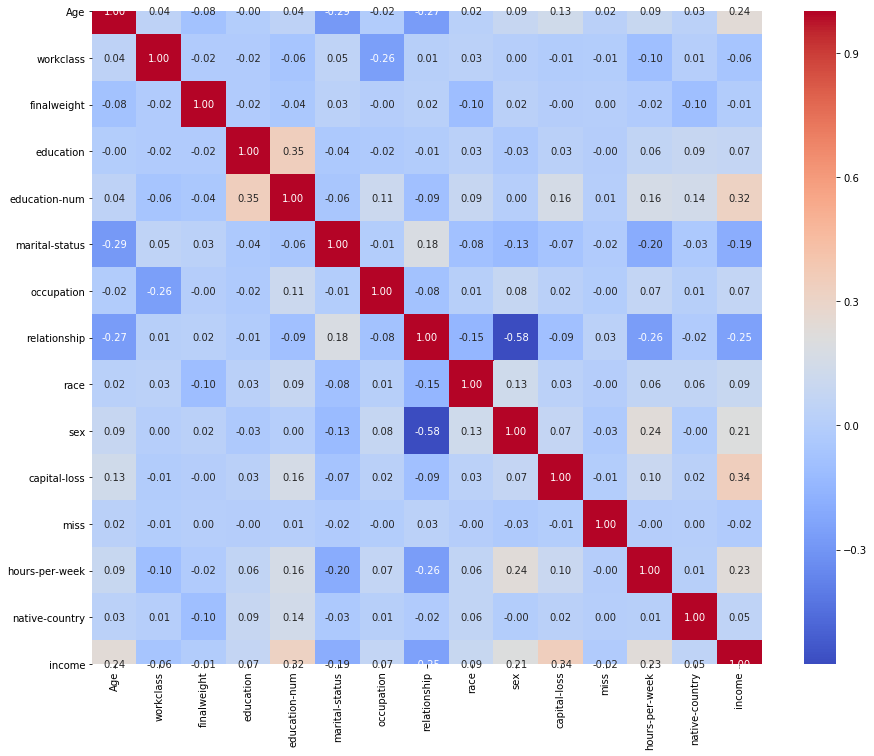

In [34]:
#Checking correlation and using PCA method to select only highly correalted values
plt.figure(figsize=(15,12))
sns.heatmap(census.corr(),annot=True,fmt = ".2f",cmap='coolwarm')
plt.show()

In [35]:
#Separating the input and ouput variable
df_x=census.drop(columns=['income'])
y=census['income']

In [36]:
#Checking for skewness in our input and output data
print(df_x.skew())
print("Total features: ",len(df_x.skew()))
print("Skewed features: ",len(df_x.skew().loc[abs(df_x.skew())>0.5]))

Age                0.483478
workclass          1.182967
finalweight        0.626221
education         -0.957458
education-num     -0.143960
marital-status    -0.044317
occupation         0.131148
relationship       0.750207
race              -2.592931
sex               -0.684115
capital-loss       4.934878
miss              29.325736
hours-per-week    -0.358396
native-country    -5.460675
dtype: float64
Total features:  14
Skewed features:  9


In [37]:
for index in df_x.skew().index:
    if df_x.skew().loc[index]>0.5:
        df_x[index]=np.log1p(df_x[index])
    if df_x.skew().loc[index]<-0.5:
        df_x[index]=np.square(df_x[index])

In [38]:
# Again Checking for skewness in our data
print(df_x.skew())
print("Total features: ",len(df_x.skew()))
print("Skewed features: ",len(df_x.skew().loc[abs(df_x.skew())>0.5]))

Age                0.483478
workclass          0.865780
finalweight       -0.805393
education          0.140099
education-num     -0.143960
marital-status    -0.044317
occupation         0.131148
relationship       0.252965
race              -2.577741
sex               -0.684115
capital-loss       3.112810
miss              24.846938
hours-per-week    -0.358396
native-country    -5.136704
dtype: float64
Total features:  14
Skewed features:  7


In [39]:
#Using standard scalar method to Normalize our data or to bring all variable to common scale
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [40]:
# Again Checking for skewness in our data after Scaling
print(x.skew())
print("Total features: ",len(x.skew()))
print("Skewed features: ",len(x.skew().loc[abs(x.skew())>0.5]))

Age                0.483478
workclass          0.865780
finalweight       -0.805393
education          0.140099
education-num     -0.143960
marital-status    -0.044317
occupation         0.131148
relationship       0.252965
race              -2.577741
sex               -0.684115
capital-loss       3.112810
miss              24.846938
hours-per-week    -0.358396
native-country    -5.136704
dtype: float64
Total features:  14
Skewed features:  7


In [41]:
#Importing various neccessary parameters/fetures
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score 
import warnings
warnings.filterwarnings("ignore")

In [42]:
#Checking for best random state which give best accuracy/f1 score for various training techniques used to get best prediction
# Defining a class to check for best random state and f1 score.
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
def maxf1_score(tec,x,y):
    maxf1=0
    rand=0
    for r_state in range(42,100):
        train_x,test_x,train_y,test_y=train_test_split(x, y,random_state = r_state,test_size=0.20,stratify=y)
        tec.fit(train_x,train_y)
        y_pred=tec.predict(test_x)
        temp=f1_score(test_y,y_pred)
        if temp>maxf1:
            maxf1=temp
            rand=r_state
    print("Maximum f1_score is: ",maxf1, "at random state : ",rand)

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import cross_val_score
import sklearn.naive_bayes

In [44]:
train_x,test_x,train_y,test_y=train_test_split(x, y,test_size=0.20,random_state=42,stratify=y)

In [45]:
LR=LogisticRegression()
maxf1_score(LR,x,y)

Maximum f1_score is:  0.5563689604685212 at random state :  63


In [46]:
DT=DecisionTreeClassifier()
maxf1_score(DT,x,y)

Maximum f1_score is:  0.599764798118385 at random state :  42


In [47]:
KN=KNeighborsClassifier()
maxf1_score(KN,x,y)

Maximum f1_score is:  0.6264755480607083 at random state :  50


In [48]:
SV=SVC()
maxf1_score(SV,x,y)

Maximum f1_score is:  0.6087373979836774 at random state :  74


In [49]:
RF=RandomForestClassifier()
maxf1_score(RF,x,y)

Maximum f1_score is:  0.6423357664233578 at random state :  42


In [50]:
GN=GaussianNB()
maxf1_score(GN,x,y)

Maximum f1_score is:  0.608883405305367 at random state :  55


In [51]:
models=[]
models.append(('DecisionTreeClassifier', DT))
models.append(('SVC', SV))
models.append(('KNeighborsClassifier',KN))
models.append(('GaussianNB', GN))
models.append(('LogisticRegression', LR))
models.append(('RandomForestClassifier', RF))

**************** DecisionTreeClassifier ****************


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


Accuracy Score =  0.8178336980306345


Cross Value Score =  0.8058141426404035


roc_auc_score =  0.7467740503538979


Classification_report 
               precision    recall  f1-score   support

           0       0.89      0.88      0.88      4256
           1       0.59      0.62      0.60      1228

    accuracy                           0.82      5484
   macro avg       0.74      0.75      0.74      5484
weighted avg       0.82      0.82      0.82      5484



[[3726  530]
 [ 469  759]]


AxesSubplot(0.125,0.808774;0.62x0

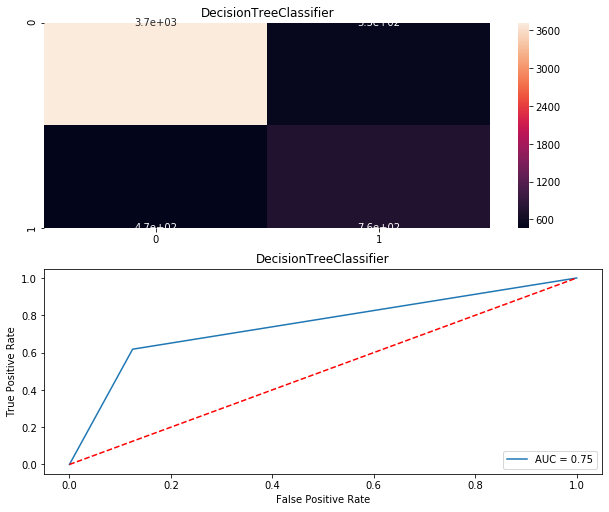

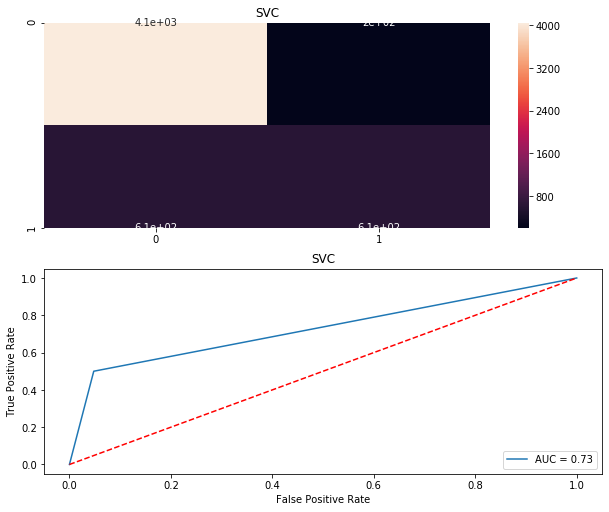

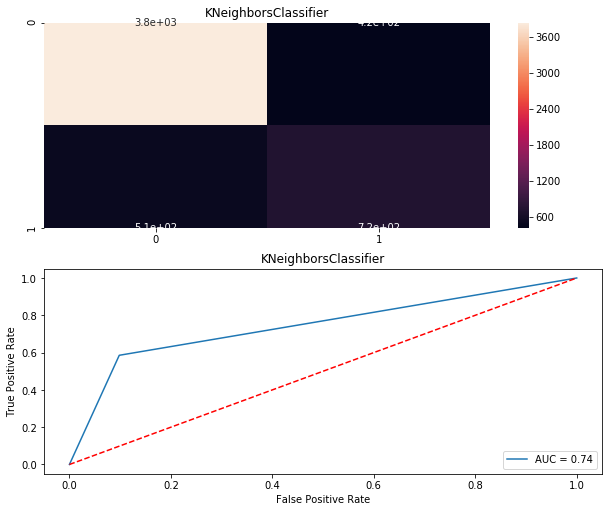

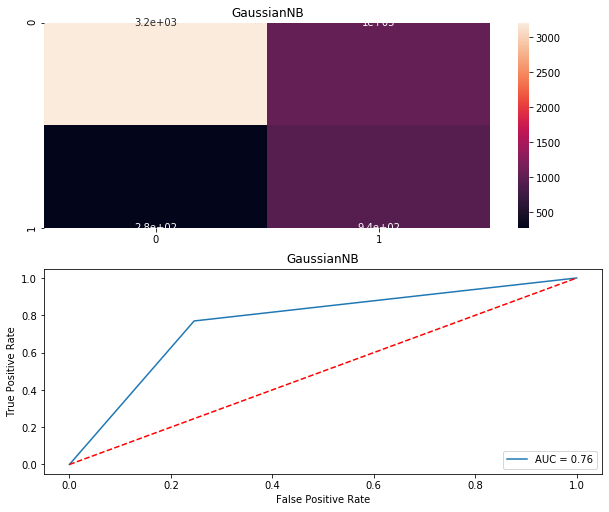

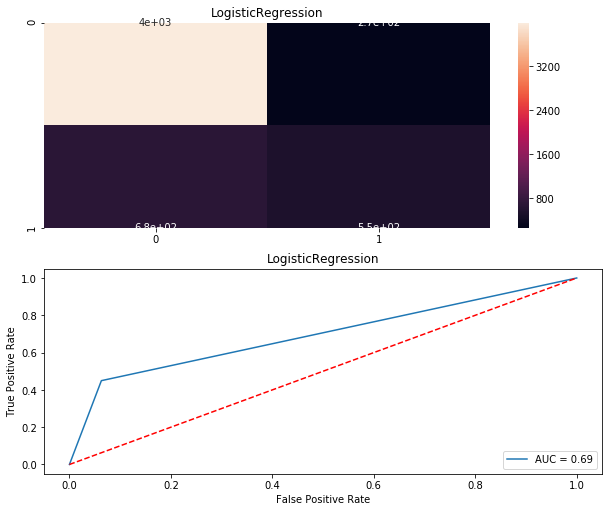

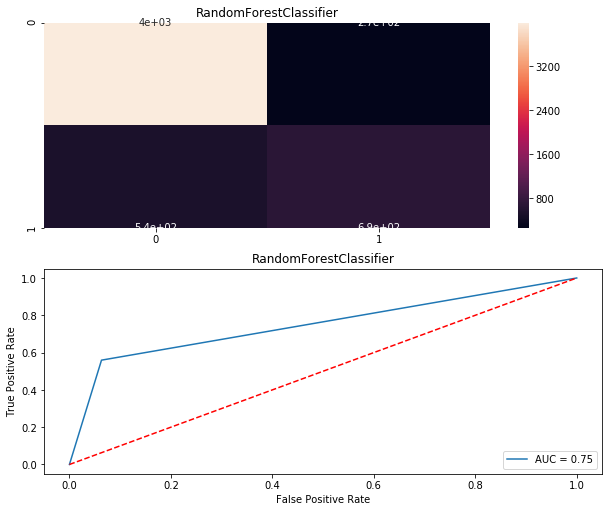

In [52]:
Model=[]
Score=[]
CVS=[]
rocscore=[]
for name,model in models:
    print('****************', name, '****************')
    print('\n')
    Model.append(name)
    model.fit(train_x,train_y)
    print(model)
    pre=model.predict(test_x)
    print('\n')
    AS= accuracy_score(test_y,pre)
    print('Accuracy Score = ', AS)
    Score.append(AS*100)
    print('\n')
    SC=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('Cross Value Score = ', SC)
    CVS.append(SC*100)
    print('\n')
    false_positive_rate, true_positive_rate,thresolds= roc_curve(test_y,pre)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score = ', roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('Classification_report \n', classification_report(test_y,pre))
    print('\n')
    cm= confusion_matrix(test_y,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')

In [53]:
result= pd.DataFrame({'Model' : Model, 'Accuracy_Score' : Score, 'Cross_val_score' : CVS, 'Roc_auc_curve': rocscore})
result

,Model,Accuracy_Score,Cross_val_score,Roc_auc_curve
0,DecisionTreeClassifier,81.783370,80.581414,74.677405
1,SVC,85.083880,84.746655,72.603383
2,KNeighborsClassifier,83.096280,82.875584,74.364530
3,GaussianNB,75.765864,75.631970,76.188665
4,LogisticRegression,82.786287,82.868287,69.327074
5,RandomForestClassifier,85.229759,84.557063,74.812068


We can see that we are getting almost equal accuracy with SVC and Random Forest Classifiers , we can save our final model now

In [54]:
# Saving our final model using Joblib
from sklearn.externals import joblib 
  

joblib.dump(RF, 'RF_Census-Income.pkl')

['RF_Census-Income.pkl']

**This is the best and final model we have saved**